In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [6]:

df = pd.read_csv('2017.csv')
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01,AA,1,JFK,LAX,800,831.0,31.0,25.0,856.0,...,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,NaN
1,2017-01-01,AA,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,...,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,NaN
2,2017-01-01,AA,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,...,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,NaN
3,2017-01-01,AA,5,DFW,HNL,1135,1252.0,77.0,19.0,1311.0,...,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,NaN
4,2017-01-01,AA,6,OGG,DFW,1855,1855.0,0.0,16.0,1911.0,...,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,NaN


In [7]:
print("Number of unique op_carries: ", len(df['OP_CARRIER'].unique()))
df['OP_CARRIER'].value_counts()

Number of unique op_carries:  12


WN    1329444
DL     923560
AA     896348
OO     706527
UA     584481
EV     339541
B6     298654
AS     185068
NK     156818
F9     103027
HA      80172
VX      70981
Name: OP_CARRIER, dtype: int64

In [8]:
# take 70981 samples from each carrier
df = df.groupby('OP_CARRIER').apply(lambda x: x.sample(n=70981, random_state=1))
df['OP_CARRIER'].value_counts()

AA    70981
AS    70981
B6    70981
DL    70981
EV    70981
F9    70981
HA    70981
NK    70981
OO    70981
UA    70981
VX    70981
WN    70981
Name: OP_CARRIER, dtype: int64

In [9]:
df['FL_DAY'] = df['FL_DATE'].map(lambda x: x.split('-')[2])
df['FL_MONTH'] = df['FL_DATE'].map(lambda x: x.split('-')[1])
df['FL_YEAR'] = df['FL_DATE'].map(lambda x: x.split('-')[0])
df['FL_YEAR'] = df['FL_YEAR'].astype(int)
df['FL_MONTH'] = df['FL_MONTH'].astype(int)
df['FL_DAY'] = df['FL_DAY'].astype(int)
df = df.dropna(subset=['ARR_TIME', 'DEP_TIME', 'DEP_DELAY', 'ARR_DELAY', 'CRS_DEP_TIME', 'CRS_ARR_TIME'])
df['CRS_DEP_HOUR'] = df['CRS_DEP_TIME'].map(lambda x: int(x/100))
df['CRS_DEP_MIN'] = df['CRS_DEP_TIME'].map(lambda x: int(x%100))
# split the DEP_TIME into hours and minutes
df['DEP_TIME_HOUR'] = df['DEP_TIME'].map(lambda x: int(x/100))
df['DEP_TIME_MIN'] = df['DEP_TIME'].map(lambda x: int(x%100))
# split the WHEELS_OFF into hours and minutes
df['WHEELS_OFF_HOUR'] = df['WHEELS_OFF'].map(lambda x: int(x/100))
df['WHEELS_OFF_MIN'] = df['WHEELS_OFF'].map(lambda x: int(x%100))
# split the WHEELS_ON into hours and minutes
df['WHEELS_ON_HOUR'] = df['WHEELS_ON'].map(lambda x: int(x/100))
df['WHEELS_ON_MIN'] = df['WHEELS_ON'].map(lambda x: int(x%100))
# split the CRS_ARR_TIME into hours and minutes
df['CRS_ARR_HOUR'] = df['CRS_ARR_TIME'].map(lambda x: int(x/100))
df['CRS_ARR_MIN'] = df['CRS_ARR_TIME'].map(lambda x: int(x%100))
# split the ARR_TIME into hours and minutes
df['ARR_TIME_HOUR'] = df['ARR_TIME'].map(lambda x: int(x/100))
df['ARR_TIME_MIN'] = df['ARR_TIME'].map(lambda x: int(x%100))
# drop the columns that are not required- CRS_DEP_TIME, DEP_TIME, WHEELS_OFF, WHEELS_ON, CRS_ARR_TIME, ARR_TIME
df = df.drop(columns=['CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME'])




In [10]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [11]:
df = encode(df,'CRS_DEP_HOUR', 24)
df = encode(df,'CRS_DEP_MIN', 60)
df = encode(df,'DEP_TIME_HOUR', 24)
df = encode(df,'DEP_TIME_MIN', 60)
df = encode(df,'WHEELS_OFF_HOUR', 24)
df = encode(df,'WHEELS_OFF_MIN', 60)
df = encode(df,'WHEELS_ON_HOUR', 24)
df = encode(df,'WHEELS_ON_MIN', 60)
df = encode(df,'CRS_ARR_HOUR', 24)
df = encode(df,'CRS_ARR_MIN', 60)
df = encode(df,'ARR_TIME_HOUR', 24)
df = encode(df,'ARR_TIME_MIN', 60)

df['FL_MONTH'] = df['FL_MONTH']-1
df['FL_DAY'] = df['FL_DAY']-1
df = encode(df,'FL_MONTH', 12)
df = encode(df,'FL_DAY', 31)

In [12]:
df = df.drop(columns=['CRS_DEP_HOUR', 'CRS_DEP_MIN', 'DEP_TIME_HOUR', 'DEP_TIME_MIN', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MIN', 'WHEELS_ON_HOUR', 'WHEELS_ON_MIN', 'CRS_ARR_HOUR', 'CRS_ARR_MIN', 'ARR_TIME_HOUR', 'ARR_TIME_MIN', 'FL_MONTH', 'FL_DAY'])



In [13]:
print(df.isnull().sum())
df['CARRIER_DELAY'] = df['CARRIER_DELAY'].fillna(0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)
df['NAS_DELAY'] = df['NAS_DELAY'].fillna(0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(0)
print(df.isnull().sum())


FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
DEP_DELAY                   0
TAXI_OUT                    0
TAXI_IN                     0
ARR_DELAY                   0
CANCELLED                   0
CANCELLATION_CODE      836592
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME         0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY          675025
WEATHER_DELAY          675025
NAS_DELAY              675025
SECURITY_DELAY         675025
LATE_AIRCRAFT_DELAY    675025
Unnamed: 27            836592
FL_YEAR                     0
CRS_DEP_HOUR_sin            0
CRS_DEP_HOUR_cos            0
CRS_DEP_MIN_sin             0
CRS_DEP_MIN_cos             0
DEP_TIME_HOUR_sin           0
DEP_TIME_HOUR_cos           0
DEP_TIME_MIN_sin            0
DEP_TIME_MIN_cos            0
WHEELS_OFF_HOUR_sin         0
WHEELS_OFF_HOUR_cos         0
WHEELS_OFF

In [14]:
# drop FL_DATE,Cancellation code,op_Carrierflnum
df = df.drop(columns=['FL_DATE', 'CANCELLATION_CODE', 'OP_CARRIER_FL_NUM'])
print(df.shape)
df.head()

(836592, 48)


OP_CARRIER ORIGIN DEST  DEP_DELAY  TAXI_OUT  TAXI_IN  \
OP_CARRIER                                                                
AA         1389498         AA    PHX  STL       -6.0      21.0      4.0   
           5204087         AA    CLT  DEN       -5.0      16.0      8.0   
           3188972         AA    DFW  TUL       -6.0      16.0      4.0   
           2306485         AA    DFW  ELP       50.0      23.0      3.0   
           4475154         AA    ALB  CLT       -7.0       9.0      5.0   

                    ARR_DELAY  CANCELLED  DIVERTED  CRS_ELAPSED_TIME  ...  \
OP_CARRIER                                                            ...   
AA         1389498      -17.0        0.0       0.0             178.0  ...   
           5204087      -26.0        0.0       0.0             235.0  ...   
           3188972       -2.0        0.0       0.0              62.0  ...   
           2306485       49.0        0.0       0.0             105.0  ...   
           4475154      -21.0        0.0       0.0             125.0  ...   

                    CRS_ARR_MIN_sin  CRS_ARR_MIN_cos  ARR_TIME_HOUR_sin  \
OP_CARRIER                                                                
AA         1389498        -0.994522        -0.104528          -0.258819   
           5204087        -0.587785         0.809017          -0.258819   
           3188972         0.994522         0.104528          -0.707107   
           2306485         0.866025         0.500000          -0.500000   
           4475154         0.978148        -0.207912          -0.866025   

                    ARR_TIME_HOUR_cos  ARR_TIME_MIN_sin  ARR_TIME_MIN_cos  \
OP_CARRIER                                                                  
AA         1389498          -0.965926          0.309017         -0.951057   
           5204087          -0.965926          0.207912         -0.978148   
           3188972           0.707107          0.951057          0.309017   
           2306485          -0.866025         -0.104528          0.994522   
           4475154           0.500000         -0.406737          0.913545   

                    FL_MONTH_sin  FL_MONTH_cos  FL_DAY_sin  FL_DAY_cos  
OP_CARRIER                                                              
AA         1389498  1.000000e+00  6.123234e-17    0.394356    0.918958  
           5204087 -8.660254e-01  5.000000e-01   -0.394356    0.918958  
           3188972  1.224647e-16 -1.000000e+00   -0.998717   -0.050649  
           2306485  5.000000e-01 -8.660254e-01    0.000000    1.000000  
           4475154 -1.000000e+00 -1.836970e-16    0.651372   -0.758758  

[5 rows x 48 columns]

In [15]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['DEP_DELAY'])
y = df['DEP_DELAY']
label_encoder_op_carrier = LabelEncoder()
label_encoder_origin = LabelEncoder()
label_encoder_dest = LabelEncoder()
X['OP_CARRIER'] = label_encoder_op_carrier.fit_transform(X['OP_CARRIER'])
X['ORIGIN'] = label_encoder_origin.fit_transform(X['ORIGIN'])
X['DEST'] = label_encoder_dest.fit_transform(X['DEST'])

In [16]:
print(X)

                    OP_CARRIER  ORIGIN  DEST  TAXI_OUT  TAXI_IN  ARR_DELAY  \
OP_CARRIER                                                                   
AA         1389498           0     236   289      21.0      4.0      -17.0   
           5204087           0      66    82      16.0      8.0      -26.0   
           3188972           0      83   302      16.0      4.0       -2.0   
           2306485           0      83    96      23.0      3.0       49.0   
           4475154           0      14    66       9.0      5.0      -21.0   
...                        ...     ...   ...       ...      ...        ...   
WN         1698267          11     280   265      13.0      4.0       35.0   
           2300980          11     280   172      10.0      9.0       -4.0   
           1271774          11       2    82       8.0      4.0       -9.0   
           4429936          11      82   213      12.0      3.0       -8.0   
           620344           11     236    89       7.0      6.0 

In [17]:
import torch
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


num_of_features = X_train.shape[1]
num_of_epochs = 50
learning_rate = 1e-6

In [18]:
X_train.isnull().sum()
# are there any nan values in the dataset
print(X_train.isnull().values.any())
# if there is any nan value, then fill it with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
print(X_train.isnull().values.any())
print(y_train.isnull().values.any())


True
False
False


In [19]:
#applying linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))




Mean Absolute Error: 0.0017213985919974878
Mean Squared Error: 5.820532058995866e-06
R2 Score: 0.9999999969923459


In [20]:
print(y_pred)


[50.99914176 -2.00067748 -2.99707404 ... -9.99844525  4.99982828
 -6.0008481 ]


In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(669273, 47)
(669273,)
(167319, 47)
(167319,)


Epoch [1/10], Loss: -0.3425, Batch Number: 20915
Epoch [1/10], Loss: -0.3425
Epoch [2/10], Loss: -0.3309, Batch Number: 20915
Epoch [2/10], Loss: -0.3309
Epoch [3/10], Loss: -0.3273, Batch Number: 20915
Epoch [3/10], Loss: -0.3273
Epoch [4/10], Loss: -0.3286, Batch Number: 20915
Epoch [4/10], Loss: -0.3286
Epoch [5/10], Loss: -0.3335, Batch Number: 20915
Epoch [5/10], Loss: -0.3335
Epoch [6/10], Loss: -0.3260, Batch Number: 20915
Epoch [6/10], Loss: -0.3260
Epoch [7/10], Loss: -0.3256, Batch Number: 20915
Epoch [7/10], Loss: -0.3256
Epoch [8/10], Loss: -0.3195, Batch Number: 20915
Epoch [8/10], Loss: -0.3195
Epoch [9/10], Loss: -0.3228, Batch Number: 20915
Epoch [9/10], Loss: -0.3228
Epoch [10/10], Loss: -0.3253, Batch Number: 20915
Epoch [10/10], Loss: -0.3253
fc1.weight: tensor([[-1.3929e-01,  3.9433e-02,  1.1804e-01,  9.3182e-02, -2.1064e-02,
         -5.9879e-02,  1.0111e-01, -1.2608e-01,  9.2046e-02,  1.3126e-01,
          4.7026e-02, -1.1520e-02, -8.0924e-04, -1.0351e-01,  1.4206

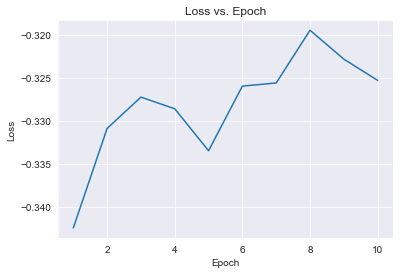

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Assuming you have x_train and y_train as tensors
# Make sure to load your actual dataset here

# Define the neural network model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(16, 4)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(4, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
model = LinearRegressionModel(47)

# Define loss function and optimizer
# use R2 loss function


optimizer = optim.SGD(model.parameters(), lr=1e-2)  # Stochastic Gradient Descent

# Prepare data using DataLoader
batch_size = 32
# chnage df X_train to numpy
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()


dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 10
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0

    for batch_x, batch_y in dataloader:
        # Forward pass
        outputs = model(batch_x)

        # Compute the loss using r2 loss function
        loss = metrics.r2_score(batch_y, outputs.detach().numpy())
        epoch_loss += loss.item()

        # Backpropagation and optimization
        optimizer.zero_grad()
        # loss.backward()
        optimizer.step()
    #     print(loss,batch number and loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss / len(dataloader):.4f}, Batch Number: {len(dataloader)}')

    # Append the average loss for this epoch to the list
    losses.append(epoch_loss / len(dataloader))

    # Print the loss at the end of each epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {losses[-1]:.4f}')

# Print the final learned parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data}')

# Optionally, plot the loss versus epoch
import matplotlib.pyplot as plt
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.grid(True)
plt.show()


In [23]:
# chnage df X_test to numpy and then to tensor
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()
y_pred = model(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred.detach().numpy()))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred.detach().numpy()))
print('R2 Score:', metrics.r2_score(y_test, y_pred.detach().numpy()))



Mean Absolute Error: 24.561064
Mean Squared Error: 1918.365
R2 Score: 0.008719881968687337


## APPLY PCA BEFORE APPLYING LINEAR REGRESSION

In [24]:
from sklearn.decomposition import PCA


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.isnull().sum()
# are there any nan values in the dataset
# print(X_train.isnull().values.any())
# if there is any nan value, then fill it with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
print(X_train.isnull().values.any())
print(y_train.isnull().values.any())

True
False
False


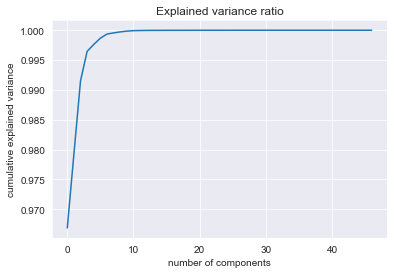

In [44]:
# draw a explained variance ratio graph
pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained variance ratio')
plt.show()


In [45]:
# number of components which explain 90% of the variance
pca = PCA(0.9)
pca.fit(X_train)
print(pca.n_components_)

1


In [46]:
# apply pca to X_train and X_test
pca = PCA(n_components=0.9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [47]:
# data type of X_train
print(type(X_train), type(X_test), type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [48]:
y_train = y_train.to_numpy()

Epoch [1/10], Loss: -4.6656, Batch Number: 20915
Epoch [1/10], Loss: -4.6656
Epoch [2/10], Loss: -4.5696, Batch Number: 20915
Epoch [2/10], Loss: -4.5696
Epoch [3/10], Loss: -4.5858, Batch Number: 20915
Epoch [3/10], Loss: -4.5858
Epoch [4/10], Loss: -4.5871, Batch Number: 20915
Epoch [4/10], Loss: -4.5871
Epoch [5/10], Loss: -4.5472, Batch Number: 20915
Epoch [5/10], Loss: -4.5472
Epoch [6/10], Loss: -4.5949, Batch Number: 20915
Epoch [6/10], Loss: -4.5949
Epoch [7/10], Loss: -4.6565, Batch Number: 20915
Epoch [7/10], Loss: -4.6565
Epoch [8/10], Loss: -4.5376, Batch Number: 20915
Epoch [8/10], Loss: -4.5376
Epoch [9/10], Loss: -4.6192, Batch Number: 20915
Epoch [9/10], Loss: -4.6192
Epoch [10/10], Loss: -4.6047, Batch Number: 20915
Epoch [10/10], Loss: -4.6047
fc1.weight: tensor([[-0.7898],
        [ 0.5080],
        [ 0.2043],
        [-0.4259],
        [-0.6880],
        [ 0.5665],
        [ 0.6115],
        [-0.6953],
        [-0.1971],
        [ 0.5541],
        [-0.4723],
       

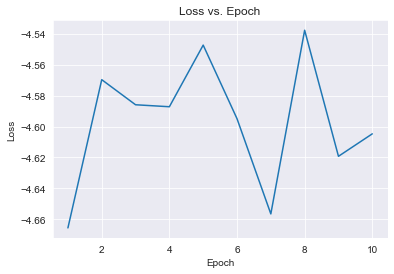

Mean Absolute Error: 46.772842
Mean Squared Error: 4207.3975
R2 Score: -1.1740961076118817
--------------------------------------------
Epoch [1/10], Loss: -0.3372, Batch Number: 20915
Epoch [1/10], Loss: -0.3372
Epoch [2/10], Loss: -0.3372, Batch Number: 20915
Epoch [2/10], Loss: -0.3372
Epoch [3/10], Loss: -0.3362, Batch Number: 20915
Epoch [3/10], Loss: -0.3362
Epoch [4/10], Loss: -0.3361, Batch Number: 20915
Epoch [4/10], Loss: -0.3361
Epoch [5/10], Loss: -0.3369, Batch Number: 20915
Epoch [5/10], Loss: -0.3369
Epoch [6/10], Loss: -0.3360, Batch Number: 20915
Epoch [6/10], Loss: -0.3360
Epoch [7/10], Loss: -0.3359, Batch Number: 20915
Epoch [7/10], Loss: -0.3359
Epoch [8/10], Loss: -0.3377, Batch Number: 20915
Epoch [8/10], Loss: -0.3377
Epoch [9/10], Loss: -0.3354, Batch Number: 20915
Epoch [9/10], Loss: -0.3354
Epoch [10/10], Loss: -0.3367, Batch Number: 20915
Epoch [10/10], Loss: -0.3367
fc1.weight: tensor([[-0.6793, -0.0049],
        [ 0.3216, -0.2207],
        [ 0.4284, -0.672

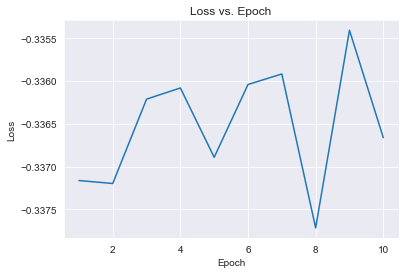

Mean Absolute Error: 19.987118
Mean Squared Error: 2224.7256
R2 Score: -0.14958651348875684
--------------------------------------------
Epoch [1/10], Loss: -4.1065, Batch Number: 20915
Epoch [1/10], Loss: -4.1065
Epoch [2/10], Loss: -4.0458, Batch Number: 20915
Epoch [2/10], Loss: -4.0458
Epoch [3/10], Loss: -4.0930, Batch Number: 20915
Epoch [3/10], Loss: -4.0930
Epoch [4/10], Loss: -4.0394, Batch Number: 20915
Epoch [4/10], Loss: -4.0394
Epoch [5/10], Loss: -4.0366, Batch Number: 20915
Epoch [5/10], Loss: -4.0366
Epoch [6/10], Loss: -4.0482, Batch Number: 20915
Epoch [6/10], Loss: -4.0482
Epoch [7/10], Loss: -4.0437, Batch Number: 20915
Epoch [7/10], Loss: -4.0437
Epoch [8/10], Loss: -4.0506, Batch Number: 20915
Epoch [8/10], Loss: -4.0506
Epoch [9/10], Loss: -4.0742, Batch Number: 20915
Epoch [9/10], Loss: -4.0742
Epoch [10/10], Loss: -4.0638, Batch Number: 20915
Epoch [10/10], Loss: -4.0638
fc1.weight: tensor([[-0.1959, -0.3225, -0.5402],
        [-0.2643, -0.3049,  0.1463],
     

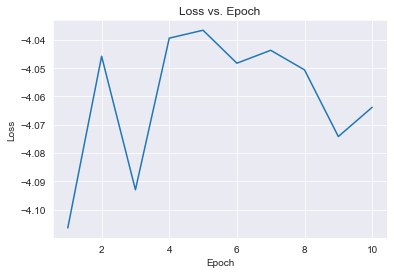

Mean Absolute Error: 38.203995
Mean Squared Error: 4407.1216
R2 Score: -1.2772996125047338
--------------------------------------------
Epoch [1/10], Loss: -0.9937, Batch Number: 20915
Epoch [1/10], Loss: -0.9937
Epoch [2/10], Loss: -0.9819, Batch Number: 20915
Epoch [2/10], Loss: -0.9819
Epoch [3/10], Loss: -0.9844, Batch Number: 20915
Epoch [3/10], Loss: -0.9844
Epoch [4/10], Loss: -0.9836, Batch Number: 20915
Epoch [4/10], Loss: -0.9836
Epoch [5/10], Loss: -0.9988, Batch Number: 20915
Epoch [5/10], Loss: -0.9988
Epoch [6/10], Loss: -0.9941, Batch Number: 20915
Epoch [6/10], Loss: -0.9941
Epoch [7/10], Loss: -0.9861, Batch Number: 20915
Epoch [7/10], Loss: -0.9861
Epoch [8/10], Loss: -0.9828, Batch Number: 20915
Epoch [8/10], Loss: -0.9828
Epoch [9/10], Loss: -0.9847, Batch Number: 20915
Epoch [9/10], Loss: -0.9847
Epoch [10/10], Loss: -0.9905, Batch Number: 20915
Epoch [10/10], Loss: -0.9905
fc1.weight: tensor([[-0.1497,  0.0612,  0.0492,  0.4828],
        [ 0.0116, -0.3331,  0.1047

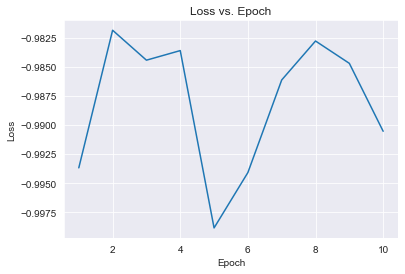

Mean Absolute Error: 27.339235
Mean Squared Error: 2636.081
R2 Score: -0.36214691770759466
--------------------------------------------
Epoch [1/10], Loss: -0.9252, Batch Number: 20915
Epoch [1/10], Loss: -0.9252
Epoch [2/10], Loss: -0.9413, Batch Number: 20915
Epoch [2/10], Loss: -0.9413
Epoch [3/10], Loss: -0.9083, Batch Number: 20915
Epoch [3/10], Loss: -0.9083
Epoch [4/10], Loss: -0.9351, Batch Number: 20915
Epoch [4/10], Loss: -0.9351
Epoch [5/10], Loss: -0.9300, Batch Number: 20915
Epoch [5/10], Loss: -0.9300
Epoch [6/10], Loss: -0.9195, Batch Number: 20915
Epoch [6/10], Loss: -0.9195
Epoch [7/10], Loss: -0.9232, Batch Number: 20915
Epoch [7/10], Loss: -0.9232
Epoch [8/10], Loss: -0.9185, Batch Number: 20915
Epoch [8/10], Loss: -0.9185
Epoch [9/10], Loss: -0.9360, Batch Number: 20915
Epoch [9/10], Loss: -0.9360
Epoch [10/10], Loss: -0.9074, Batch Number: 20915
Epoch [10/10], Loss: -0.9074
fc1.weight: tensor([[ 0.0873,  0.1114,  0.3123, -0.2324,  0.4091],
        [-0.0977, -0.0593

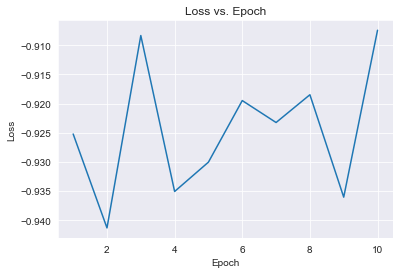

Mean Absolute Error: 26.375751
Mean Squared Error: 2110.5488
R2 Score: -0.09058765927867518
--------------------------------------------
Epoch [1/10], Loss: -2.4023, Batch Number: 20915
Epoch [1/10], Loss: -2.4023
Epoch [2/10], Loss: -2.4388, Batch Number: 20915
Epoch [2/10], Loss: -2.4388
Epoch [3/10], Loss: -2.3893, Batch Number: 20915
Epoch [3/10], Loss: -2.3893
Epoch [4/10], Loss: -2.4177, Batch Number: 20915
Epoch [4/10], Loss: -2.4177
Epoch [5/10], Loss: -2.4250, Batch Number: 20915
Epoch [5/10], Loss: -2.4250
Epoch [6/10], Loss: -2.4181, Batch Number: 20915
Epoch [6/10], Loss: -2.4181
Epoch [7/10], Loss: -2.4003, Batch Number: 20915
Epoch [7/10], Loss: -2.4003
Epoch [8/10], Loss: -2.4184, Batch Number: 20915
Epoch [8/10], Loss: -2.4184
Epoch [9/10], Loss: -2.4229, Batch Number: 20915
Epoch [9/10], Loss: -2.4229
Epoch [10/10], Loss: -2.4182, Batch Number: 20915
Epoch [10/10], Loss: -2.4182
fc1.weight: tensor([[-0.2548, -0.1914, -0.2745, -0.1552, -0.1581,  0.2117],
        [-0.002

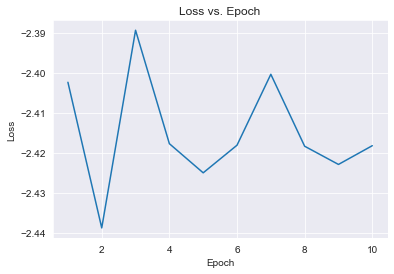

Mean Absolute Error: 35.77721
Mean Squared Error: 3516.3547
R2 Score: -0.8170123692490721
--------------------------------------------
Epoch [1/10], Loss: -0.5568, Batch Number: 20915
Epoch [1/10], Loss: -0.5568
Epoch [2/10], Loss: -0.5523, Batch Number: 20915
Epoch [2/10], Loss: -0.5523
Epoch [3/10], Loss: -0.5580, Batch Number: 20915
Epoch [3/10], Loss: -0.5580
Epoch [4/10], Loss: -0.5591, Batch Number: 20915
Epoch [4/10], Loss: -0.5591
Epoch [5/10], Loss: -0.5547, Batch Number: 20915
Epoch [5/10], Loss: -0.5547
Epoch [6/10], Loss: -0.5565, Batch Number: 20915
Epoch [6/10], Loss: -0.5565
Epoch [7/10], Loss: -0.5569, Batch Number: 20915
Epoch [7/10], Loss: -0.5569
Epoch [8/10], Loss: -0.5591, Batch Number: 20915
Epoch [8/10], Loss: -0.5591
Epoch [9/10], Loss: -0.5544, Batch Number: 20915
Epoch [9/10], Loss: -0.5544
Epoch [10/10], Loss: -0.5583, Batch Number: 20915
Epoch [10/10], Loss: -0.5583
fc1.weight: tensor([[ 0.3033,  0.3501, -0.0164, -0.3756, -0.2735,  0.0939,  0.3508],
        

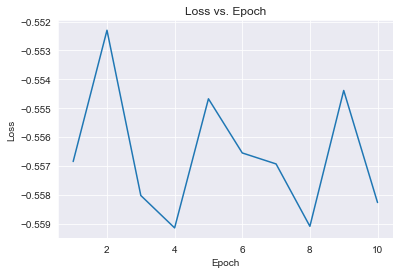

Mean Absolute Error: 20.743813
Mean Squared Error: 2388.1016
R2 Score: -0.23400833608255756
--------------------------------------------
Epoch [1/10], Loss: -2.6609, Batch Number: 20915
Epoch [1/10], Loss: -2.6609
Epoch [2/10], Loss: -2.6364, Batch Number: 20915
Epoch [2/10], Loss: -2.6364
Epoch [3/10], Loss: -2.6480, Batch Number: 20915
Epoch [3/10], Loss: -2.6480
Epoch [4/10], Loss: -2.6619, Batch Number: 20915
Epoch [4/10], Loss: -2.6619
Epoch [5/10], Loss: -2.6475, Batch Number: 20915
Epoch [5/10], Loss: -2.6475
Epoch [6/10], Loss: -2.6115, Batch Number: 20915
Epoch [6/10], Loss: -2.6115
Epoch [7/10], Loss: -2.6541, Batch Number: 20915
Epoch [7/10], Loss: -2.6541
Epoch [8/10], Loss: -2.6499, Batch Number: 20915
Epoch [8/10], Loss: -2.6499
Epoch [9/10], Loss: -2.6519, Batch Number: 20915
Epoch [9/10], Loss: -2.6519
Epoch [10/10], Loss: -2.6530, Batch Number: 20915
Epoch [10/10], Loss: -2.6530
fc1.weight: tensor([[-0.3471,  0.0015, -0.1492, -0.1423, -0.1082, -0.0935,  0.1745,  0.0930

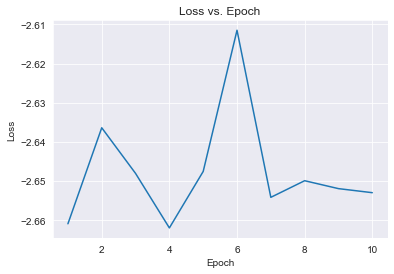

Mean Absolute Error: 36.786682
Mean Squared Error: 3600.8342
R2 Score: -0.8606656898188803
--------------------------------------------
Epoch [1/10], Loss: -3.6223, Batch Number: 20915
Epoch [1/10], Loss: -3.6223
Epoch [2/10], Loss: -3.6578, Batch Number: 20915
Epoch [2/10], Loss: -3.6578
Epoch [3/10], Loss: -3.6593, Batch Number: 20915
Epoch [3/10], Loss: -3.6593
Epoch [4/10], Loss: -3.6390, Batch Number: 20915
Epoch [4/10], Loss: -3.6390
Epoch [5/10], Loss: -3.6792, Batch Number: 20915
Epoch [5/10], Loss: -3.6792
Epoch [6/10], Loss: -3.6534, Batch Number: 20915
Epoch [6/10], Loss: -3.6534
Epoch [7/10], Loss: -3.6206, Batch Number: 20915
Epoch [7/10], Loss: -3.6206
Epoch [8/10], Loss: -3.6494, Batch Number: 20915
Epoch [8/10], Loss: -3.6494
Epoch [9/10], Loss: -3.6437, Batch Number: 20915
Epoch [9/10], Loss: -3.6437
Epoch [10/10], Loss: -3.6266, Batch Number: 20915
Epoch [10/10], Loss: -3.6266
fc1.weight: tensor([[ 0.0236, -0.2246,  0.0113,  0.2811,  0.0069, -0.0932, -0.1697, -0.2808,

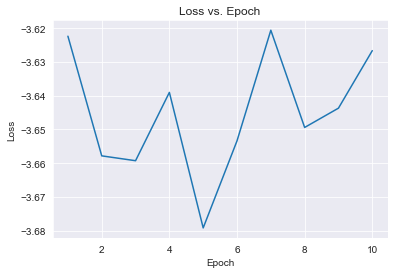

Mean Absolute Error: 41.113216
Mean Squared Error: 4336.4214
R2 Score: -1.2407666431914097
--------------------------------------------
Epoch [1/10], Loss: -0.1769, Batch Number: 20915
Epoch [1/10], Loss: -0.1769
Epoch [2/10], Loss: -0.1768, Batch Number: 20915
Epoch [2/10], Loss: -0.1768
Epoch [3/10], Loss: -0.1758, Batch Number: 20915
Epoch [3/10], Loss: -0.1758
Epoch [4/10], Loss: -0.1774, Batch Number: 20915
Epoch [4/10], Loss: -0.1774
Epoch [5/10], Loss: -0.1766, Batch Number: 20915
Epoch [5/10], Loss: -0.1766
Epoch [6/10], Loss: -0.1769, Batch Number: 20915
Epoch [6/10], Loss: -0.1769
Epoch [7/10], Loss: -0.1772, Batch Number: 20915
Epoch [7/10], Loss: -0.1772
Epoch [8/10], Loss: -0.1763, Batch Number: 20915
Epoch [8/10], Loss: -0.1763
Epoch [9/10], Loss: -0.1771, Batch Number: 20915
Epoch [9/10], Loss: -0.1771
Epoch [10/10], Loss: -0.1771, Batch Number: 20915
Epoch [10/10], Loss: -0.1771
fc1.weight: tensor([[ 0.2726, -0.2028,  0.1936, -0.3062, -0.2325,  0.1300, -0.2738, -0.2923,

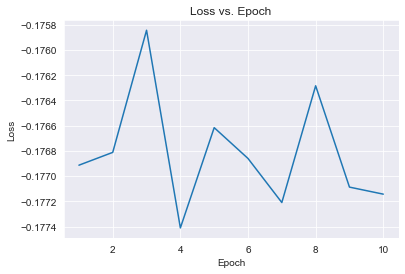

Mean Absolute Error: 18.575396
Mean Squared Error: 2145.18
R2 Score: -0.10848279668482963
--------------------------------------------
Epoch [1/10], Loss: -3.4524, Batch Number: 20915
Epoch [1/10], Loss: -3.4524
Epoch [2/10], Loss: -3.4294, Batch Number: 20915
Epoch [2/10], Loss: -3.4294
Epoch [3/10], Loss: -3.4033, Batch Number: 20915
Epoch [3/10], Loss: -3.4033
Epoch [4/10], Loss: -3.4248, Batch Number: 20915
Epoch [4/10], Loss: -3.4248
Epoch [5/10], Loss: -3.4478, Batch Number: 20915
Epoch [5/10], Loss: -3.4478
Epoch [6/10], Loss: -3.4020, Batch Number: 20915
Epoch [6/10], Loss: -3.4020
Epoch [7/10], Loss: -3.4454, Batch Number: 20915
Epoch [7/10], Loss: -3.4454
Epoch [8/10], Loss: -3.4234, Batch Number: 20915
Epoch [8/10], Loss: -3.4234
Epoch [9/10], Loss: -3.4106, Batch Number: 20915
Epoch [9/10], Loss: -3.4106
Epoch [10/10], Loss: -3.3574, Batch Number: 20915
Epoch [10/10], Loss: -3.3574
fc1.weight: tensor([[-1.2813e-01, -1.2266e-01,  1.4456e-01, -1.0093e-01,  1.6532e-01,
       

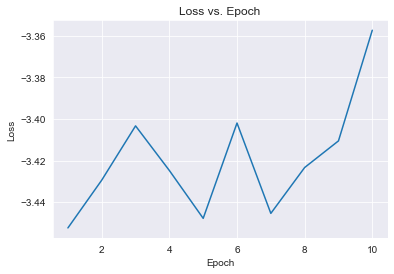

Mean Absolute Error: 42.496075
Mean Squared Error: 4084.7227
R2 Score: -1.1107061385963228
--------------------------------------------
Epoch [1/10], Loss: -0.9489, Batch Number: 20915
Epoch [1/10], Loss: -0.9489
Epoch [2/10], Loss: -0.9618, Batch Number: 20915
Epoch [2/10], Loss: -0.9618
Epoch [3/10], Loss: -0.9625, Batch Number: 20915
Epoch [3/10], Loss: -0.9625
Epoch [4/10], Loss: -0.9583, Batch Number: 20915
Epoch [4/10], Loss: -0.9583
Epoch [5/10], Loss: -0.9405, Batch Number: 20915
Epoch [5/10], Loss: -0.9405
Epoch [6/10], Loss: -0.9535, Batch Number: 20915
Epoch [6/10], Loss: -0.9535
Epoch [7/10], Loss: -0.9586, Batch Number: 20915
Epoch [7/10], Loss: -0.9586
Epoch [8/10], Loss: -0.9657, Batch Number: 20915
Epoch [8/10], Loss: -0.9657
Epoch [9/10], Loss: -0.9733, Batch Number: 20915
Epoch [9/10], Loss: -0.9733
Epoch [10/10], Loss: -0.9497, Batch Number: 20915
Epoch [10/10], Loss: -0.9497
fc1.weight: tensor([[-2.5844e-01,  5.9468e-02, -2.1999e-01, -2.0565e-01, -1.5975e-01,
      

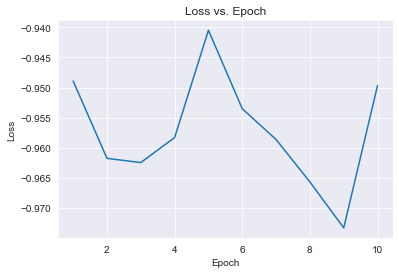

Mean Absolute Error: 26.797684
Mean Squared Error: 2249.6648
R2 Score: -0.16247338722596472
--------------------------------------------
Epoch [1/10], Loss: -2.4643, Batch Number: 20915
Epoch [1/10], Loss: -2.4643
Epoch [2/10], Loss: -2.4533, Batch Number: 20915
Epoch [2/10], Loss: -2.4533
Epoch [3/10], Loss: -2.4521, Batch Number: 20915
Epoch [3/10], Loss: -2.4521
Epoch [4/10], Loss: -2.4705, Batch Number: 20915
Epoch [4/10], Loss: -2.4705
Epoch [5/10], Loss: -2.4681, Batch Number: 20915
Epoch [5/10], Loss: -2.4681
Epoch [6/10], Loss: -2.4678, Batch Number: 20915
Epoch [6/10], Loss: -2.4678
Epoch [7/10], Loss: -2.4358, Batch Number: 20915
Epoch [7/10], Loss: -2.4358
Epoch [8/10], Loss: -2.4810, Batch Number: 20915
Epoch [8/10], Loss: -2.4810
Epoch [9/10], Loss: -2.4655, Batch Number: 20915
Epoch [9/10], Loss: -2.4655
Epoch [10/10], Loss: -2.4266, Batch Number: 20915
Epoch [10/10], Loss: -2.4266
fc1.weight: tensor([[-0.2643,  0.1856,  0.0366,  0.0028, -0.2445, -0.0902, -0.0824,  0.2185

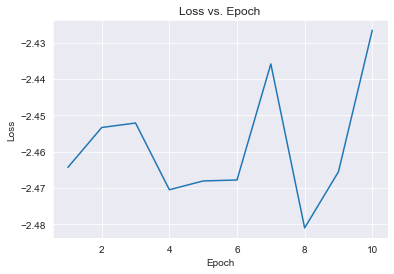

Mean Absolute Error: 31.42685
Mean Squared Error: 3453.2556
R2 Score: -0.7844069882321176
--------------------------------------------


In [56]:
xx_train, xx_test, yy_train, yy_test = train_test_split(X, y, test_size=0.2, random_state=42)
xx_train.isnull().sum()
xx_train = xx_train.fillna(0)
xx_test = xx_test.fillna(0)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Assuming you have x_train and y_train as tensors
# Make sure to load your actual dataset here

# Define the neural network model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(16, 4)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(4, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x


# Initialize the model

for i in range(1, 14):
    X_train = xx_train
    X_test = xx_test
    y_train = yy_train
    y_test = yy_test
    model = LinearRegressionModel(i)
    pca = PCA(n_components=i)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    y_train = y_train.to_numpy()


    # Define loss function and optimizer
    # use R2 loss function


    optimizer = optim.SGD(model.parameters(), lr=1e-5)  # Stochastic Gradient Descent

    # Prepare data using DataLoader
    batch_size = 32
    # chnage df X_train to numpy
    # X_train = X_train.to_numpy()
    # y_train = y_train.to_numpy()

    X_train = torch.from_numpy(X_train).float()
    y_train = torch.from_numpy(y_train).float()


    dataset = TensorDataset(X_train, y_train)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Training loop
    num_epochs = 10
    losses = []

    for epoch in range(num_epochs):
        epoch_loss = 0.0

        for batch_x, batch_y in dataloader:
            # Forward pass
            outputs = model(batch_x)

            # Compute the loss using r2 loss function
            loss = metrics.r2_score(batch_y, outputs.detach().numpy())
            epoch_loss += loss.item()

            # Backpropagation and optimization
            optimizer.zero_grad()
            # loss.backward()
            optimizer.step()
        #     print(loss,batch number and loss)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss / len(dataloader):.4f}, Batch Number: {len(dataloader)}')

        # Append the average loss for this epoch to the list
        losses.append(epoch_loss / len(dataloader))

        # Print the loss at the end of each epoch
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {losses[-1]:.4f}')

    # Print the final learned parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f'{name}: {param.data}')

    # Optionally, plot the loss versus epoch
    print("FOR PCA = ",i)
    import matplotlib.pyplot as plt
    plt.plot(range(1, num_epochs + 1), losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.grid(True)
    plt.show()
    y_test = y_test.to_numpy()
    X_test = torch.from_numpy(X_test).float()
    y_test = torch.from_numpy(y_test).float()
    y_pred = model(X_test)

    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred.detach().numpy()))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred.detach().numpy()))
    print('R2 Score:', metrics.r2_score(y_test, y_pred.detach().numpy()))

    print("--------------------------------------------")


In [51]:
    # chnage df X_test to numpy and then to tensor
# X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()
y_pred = model(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred.detach().numpy()))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred.detach().numpy()))
print('R2 Score:', metrics.r2_score(y_test, y_pred.detach().numpy()))



Mean Absolute Error: 42.434517
Mean Squared Error: 5313.496
R2 Score: -1.7456528120860373
